#  Ghana Tourism Suggestion Engine

<img src="2.jpg">

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


In [2]:
df = pd.read_csv('ghana.csv')

In [3]:
df

,Site,Type,Region,Latitude,Longitude,Comments
0,Owabi Wildlife Sanctuary,Animal Santuary,Ashanti Region,6.751843,-1.710017,"Owabi Wildlife Sanctuary is a bird sanctuary, ..."
1,Digya National Park,National Park,Brong-Ahafo Region,7.416667,-0.283333,Digya National Park is the second largest nati...
2,Bui National Park,National Park,Brong-Ahafo Region,8.300000,-2.366667,Bui National Park is notable for its Hippopota...
3,Kakum National Park,National Park,Central Region,5.416667,-1.316667,Kakum National Park is one of only 3 locations...
4,Aburi Botanical Gardens,National Park,Eastern Region,5.866667,-0.183333,Aburi Botanical Gardens is a botanical garden ...
5,Umbrella Rock,Natural Heritage Site,Eastern Region,6.158306,-0.199128,"The Umbrella Rock, as the name means, is a roc..."
6,Boti falls,Natural Heritage Site,Eastern Region,6.193000,0.216600,Boti falls is a twin waterfall located at Boti...
7,Shai Hills Resource Reserve,Natural Heritage Site,Greater Accra Region,5.909409,0.065348,Shai Hills Resource Reserve is a resource rese...
8,Mole National Park,National Park,Northern Region,9.700000,-1.833333,Mole National Park is Ghana's largest wildlife...
9,Mount Afadjato,Natural Heritage Site,Volta Region,7.144308,0.352275,Mount Afadja is one of the highest mountains i...


In [4]:
# for the city Toronto, latitude and longtitude are manually extracted via google search
ksi_latitude = 6.6666; ksi_longitude = -1.6163
gh_map = folium.Map(location = [ksi_latitude,ksi_longitude], zoom_start = 6.4, tiles = "Stamen Terrain")


# add markers to map
for lat, lng, borough, neighborhood, comments in zip(df['Latitude'], df['Longitude'], df['Region'], df['Site'],  df['Comments']):
    label = '{}, {}, {}'.format(neighborhood, borough, comments)
    html = """ 
        <!doctype html>
        <html>
        <img src="2.jpg">
        </html>"""




    iframe = folium.IFrame(html=html,width=0.5,height=0.6)
    label = folium.Popup(label,iframe)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(gh_map)
    
    
    
gh_map

In [5]:
import folium
import base64


In [6]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install folium -U

Requirement already up-to-date: folium in /home/jupyterlab/conda/lib/python3.6/site-packages (0.8.2)


In [7]:
# for the city Toronto, latitude and longtitude are manually extracted via google search
ksi_latitude = 6.6666; ksi_longitude = -1.6163
gh_map = folium.Map(location = [ksi_latitude,ksi_longitude], zoom_start = 6.4, tiles = 'Mapbox Control Room')


# add markers to map
for lat, lng, borough, neighborhood, comments in zip(df['Latitude'], df['Longitude'], df['Region'], df['Site'],  df['Comments']):
    label = '{}, {}, {}'.format(neighborhood, borough, comments)
    html = """ 
        <!doctype html>
        <html>
        <img src="2.jpg">
        </html>"""




    iframe = folium.IFrame(html=html,width=0.5,height=0.6)
    label = folium.Popup(label,iframe)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(gh_map)
    
    
    
gh_map

In [25]:
# for the city Toronto, latitude and longtitude are manually extracted via google search
ksi_latitude = 6.6666; ksi_longitude = -1.6163
gh_map = folium.Map(location = [ksi_latitude,ksi_longitude], zoom_start = 6.4)


# add markers to map
for lat, lng, borough, neighborhood, comments in zip(df['Latitude'], df['Longitude'], df['Region'], df['Site'],  df['Comments']):
    label = '{}, {}, {}'.format(neighborhood, borough, comments)
    html = """ 
        <!doctype html>
        <html>
        <img src="2.jpg">
        </html>"""




    iframe = folium.IFrame(html=html,width=0.5,height=0.6)
    label = folium.Popup(label,iframe)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(gh_map)
    
    
    
gh_map

In [8]:
CLIENT_ID = 'PGT2VDTNO4MWC55H4J2DIO4Y51AOF5F1AFUVPF30B0EZIOE2'
CLIENT_SECRET = 'F0QV3LUXISTAVOV1JZD0UH2GOJB1Q2IVOMD04GCVB3MFL5OH' 
VERSION = '20180605'

In [9]:
latitude_scar = 6.6666
longitude_scar = -1.6163

In [10]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_scar, longitude_scar, VERSION, radius, LIMIT)

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c786d9a9fb6b7415b651f3f'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 6.671100004500004,
    'lng': -1.6117778207760303},
   'sw': {'lat': 6.662099995499996, 'lng': -1.6208221792239699}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e83b118dab4c2205b8dd107',
       'name': 'Royal Park Hotel & Chinese Restaurant',
       'location': {'lat': 6.669464663886983,
        'lng': -1.6172490562625617,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.669464663886983,
          'lng': -1.6172490562625617}],
        'distance': 335,
        'cc': 'GH',
        'city': 'Kuma

In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']  
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Royal Park Hotel & Chinese Restaurant,Chinese Restaurant,6.669465,-1.617249
1,Piri Piri Fast Food,American Restaurant,6.666199,-1.617170
2,Noble House Chinese and Indian Restaurant,Chinese Restaurant,6.670509,-1.616401
3,Royal Park Rest.,Chinese Restaurant,6.664637,-1.617799
4,Royal Park Hotel & Restaurant,Hotel,6.664598,-1.617973
5,Ahodwo Roundabout,Intersection,6.669084,-1.617273
6,Hotel Georgia,Hotel,6.669435,-1.615870
7,Echoes spot,African Restaurant,6.664010,-1.617899


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
nearby_venues

,name,categories,lat,lng
0,Royal Park Hotel & Chinese Restaurant,Chinese Restaurant,6.669465,-1.617249
1,Piri Piri Fast Food,American Restaurant,6.666199,-1.617170
2,Noble House Chinese and Indian Restaurant,Chinese Restaurant,6.670509,-1.616401
3,Royal Park Rest.,Chinese Restaurant,6.664637,-1.617799
4,Royal Park Hotel & Restaurant,Hotel,6.664598,-1.617973
5,Ahodwo Roundabout,Intersection,6.669084,-1.617273
6,Hotel Georgia,Hotel,6.669435,-1.615870
7,Echoes spot,African Restaurant,6.664010,-1.617899


In [16]:
sites = getNearbyVenues(names=df['Site'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Owabi Wildlife Sanctuary
Digya National Park
Bui National Park
Kakum National Park
Aburi Botanical Gardens
Umbrella Rock
Boti falls
Shai Hills Resource Reserve
Mole National Park
Mount Afadjato
Wli waterfalls
Keta Lagoon
Bia National Park
Nini Suhien National Park
Nzulezo
Cape Coast Castle
Fort Patience
Fort Amsterdam
Elmina Castle
Wassa Domama rock shrine


In [17]:
sites.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cape Coast Castle,5.103333,-1.2425,Cape Coast Castle,5.103289,-1.241306,Tourist Information Center
1,Cape Coast Castle,5.103333,-1.2425,Oasis Beach Resort,5.103258,-1.243880,Resort
2,Cape Coast Castle,5.103333,-1.2425,Cape Coast Castle Restaurant,5.103471,-1.241924,African Restaurant
3,Cape Coast Castle,5.103333,-1.2425,Baobab Vegetarian Bar,5.105170,-1.241181,Vegetarian / Vegan Restaurant
4,Cape Coast Castle,5.103333,-1.2425,Melcom Supermarket,5.107586,-1.241851,Department Store


In [18]:
# one hot encoding
site_ven = pd.get_dummies(sites[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
site_ven['Neighborhood'] = sites['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [site_ven.columns[-1]] + list(site_ven.columns[:-1])
site_ven = site_ven[fixed_columns]

site_ven.head()

,Neighborhood,African Restaurant,Art Gallery,Boat or Ferry,Department Store,Flea Market,Historic Site,Paper / Office Supplies Store,Resort,Tourist Information Center,Vegetarian / Vegan Restaurant
0,Cape Coast Castle,0,0,0,0,0,0,0,0,1,0
1,Cape Coast Castle,0,0,0,0,0,0,0,1,0,0
2,Cape Coast Castle,1,0,0,0,0,0,0,0,0,0
3,Cape Coast Castle,0,0,0,0,0,0,0,0,0,1
4,Cape Coast Castle,0,0,0,1,0,0,0,0,0,0


In [19]:
scarb_grouped = site_ven.groupby('Neighborhood').mean().reset_index()
scarb_grouped.head(7)

,Neighborhood,African Restaurant,Art Gallery,Boat or Ferry,Department Store,Flea Market,Historic Site,Paper / Office Supplies Store,Resort,Tourist Information Center,Vegetarian / Vegan Restaurant
0,Cape Coast Castle,0.2,0.00,0.00,0.2,0.00,0.00,0.0,0.2,0.2,0.2
1,Elmina Castle,0.0,0.25,0.25,0.0,0.25,0.25,0.0,0.0,0.0,0.0
2,Wassa Domama rock shrine,0.0,0.00,0.00,0.0,0.00,0.00,1.0,0.0,0.0,0.0


In [20]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

site_clust = scarb_grouped.drop('Neighborhood',1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(site_clust)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
#len(kmeans.labels_)#=16
#scarborough_data.shape

array([0, 2, 1], dtype=int32)

In [21]:
sites

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cape Coast Castle,5.103333,-1.2425,Cape Coast Castle,5.103289,-1.241306,Tourist Information Center
1,Cape Coast Castle,5.103333,-1.2425,Oasis Beach Resort,5.103258,-1.243880,Resort
2,Cape Coast Castle,5.103333,-1.2425,Cape Coast Castle Restaurant,5.103471,-1.241924,African Restaurant
3,Cape Coast Castle,5.103333,-1.2425,Baobab Vegetarian Bar,5.105170,-1.241181,Vegetarian / Vegan Restaurant
4,Cape Coast Castle,5.103333,-1.2425,Melcom Supermarket,5.107586,-1.241851,Department Store
5,Elmina Castle,5.082600,-1.3481,Elmina Castle,5.082851,-1.349277,Historic Site
6,Elmina Castle,5.082600,-1.3481,Elmina Slave Castle,5.082629,-1.349649,Art Gallery
7,Elmina Castle,5.082600,-1.3481,Elmina Fish Market,5.082668,-1.349098,Flea Market
8,Elmina Castle,5.082600,-1.3481,Elmina Fishing Harbor,5.082628,-1.350515,Boat or Ferry
9,Wassa Domama rock shrine,7.267100,-2.8677,Dormaa press,7.269165,-2.868266,Paper / Office Supplies Store


In [26]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, ven, vc in zip(sites['Venue Latitude'], sites['Venue Longitude'], sites['Venue'], sites['Venue Category']):
    html = '<img src="image.png" style="width:400px;height:300px;">'
    label = folium.Popup( str(ven) +  str(vc),parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(gh_map)
       
gh_map

# Welcome to the Ghana Tourism Suggestion Engine

## Ghana is a beautiful country in West Africa with beatiful sites of attraction. 

### This project focuses only on 20 of them which a group by categories, and region of location.

### Categories of Tourist Sites:


1. Animal Santuary
2. National Park
3. Natural Heritage Site
4. Castle

Pick a category: Animal Santuary, National Park, Natural Heritage Site, Castle Castle


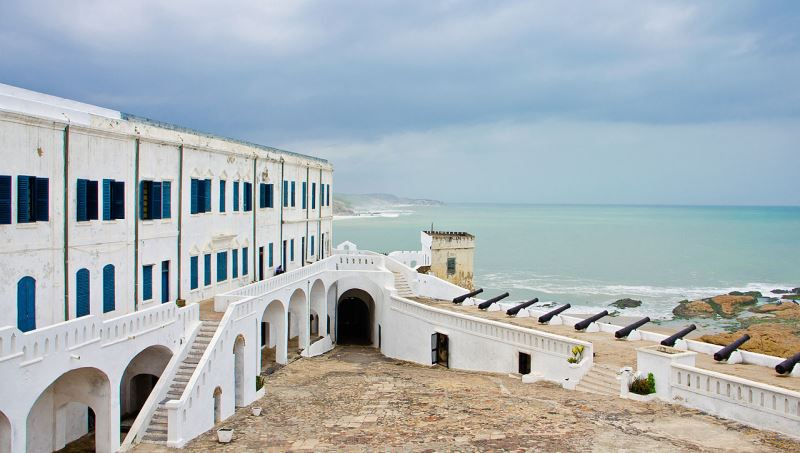

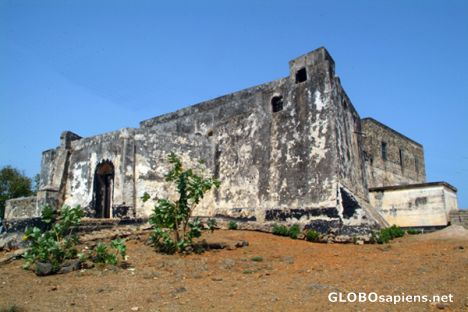

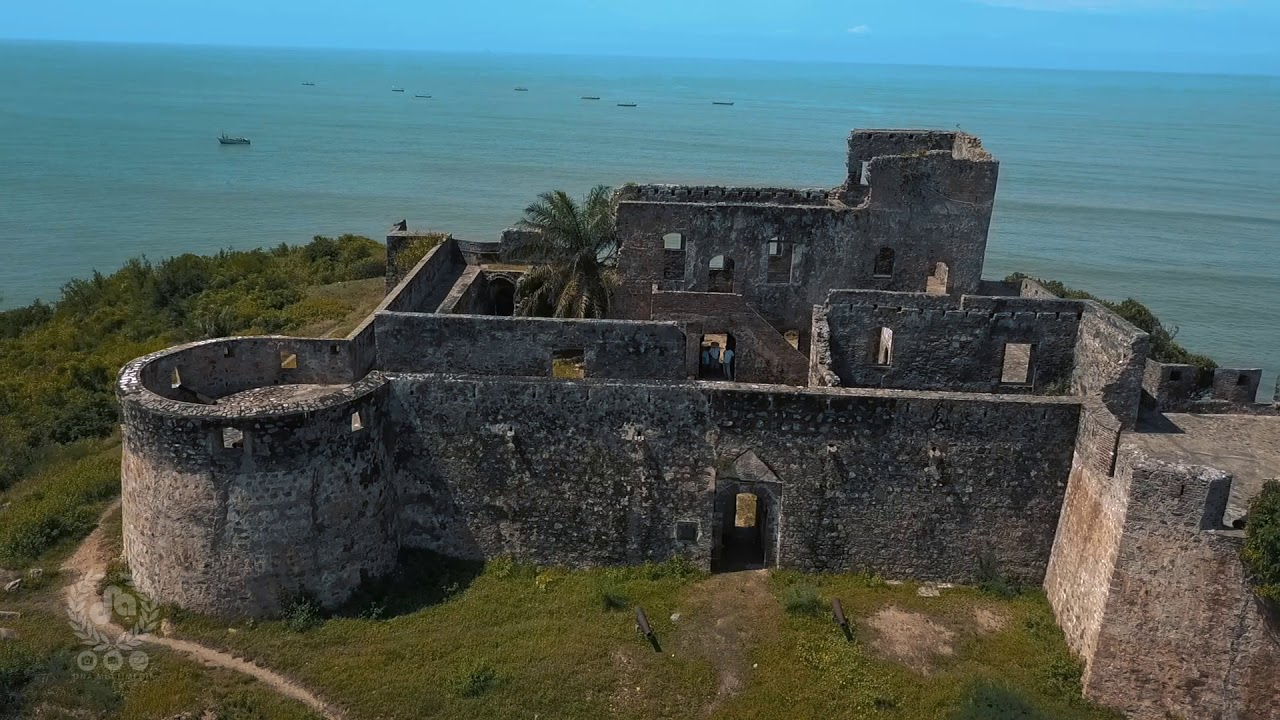

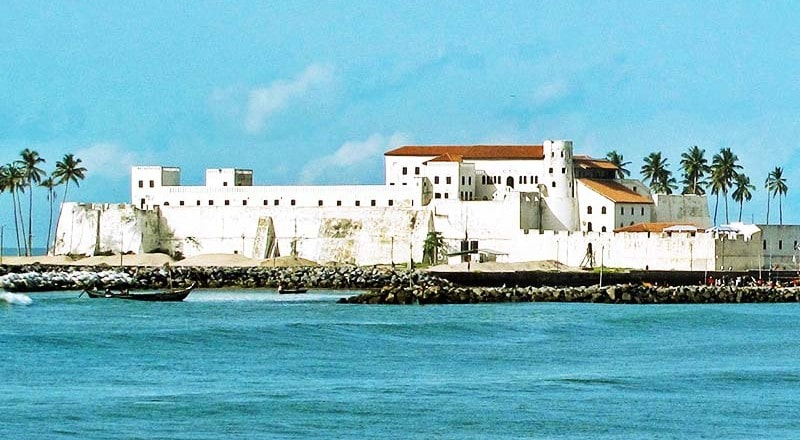

15    Cape Coast Castle
16        Fort Patience
17       Fort Amsterdam
18        Elmina Castle
Name: Site, dtype: object


In [32]:
from IPython.display import Image, display
user = str(input("Pick a category: Animal Santuary, National Park, Natural Heritage Site, Castle"))

ksi_latitude = 6.6666; ksi_longitude = -1.6163
gh_map = folium.Map(location = [ksi_latitude,ksi_longitude], zoom_start = 6.4)
    
df2 = df.loc[df['Type'] == user]

dict2= {"Animal Santuary" : ['3.jpg'], "National Parak": ['4.jpg','4a.jpg','4b.jpg','4c.jpg','4d.jpg','4e.jpg','4f.jpg'], 
        "Natural Heritage Site": ['5.jpg','5a.jpg', '5b.jpg','5c.jpg','5d.jpg', '5e.jpg','5f.jpg', '5g.jpg'], 
        "Castle": ['6.jpg','6a.jpg', '6b.jpg', '6c.jpg']}
# add markers to map
for lat, lng, borough, neighborhood, comments in zip(df2['Latitude'], df2['Longitude'], df2['Region'], df2['Site'],  df2['Comments']):
    label = '{}, {}, {}'.format(neighborhood, borough, comments)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(gh_map)
           

for imageName in dict2[user]:
    display(Image(filename=imageName))



print(df2['Site'])
gh_map